In [64]:
#predicting apple stock price

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


In [65]:
ticker="AAPL"

stock_data=yf.download(ticker, start= "2020-01-01", end ="2025-03-01")

print(stock_data)

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2020-01-02   72.716064   72.776591   71.466805   71.721011  135480400
2020-01-03   72.009109   72.771737   71.783954   71.941321  146322800
2020-01-06   72.582916   72.621654   70.876083   71.127873  118387200
2020-01-07   72.241554   72.849231   72.021238   72.592601  108872000
2020-01-08   73.403648   73.706279   71.943759   71.943759  132079200
...                ...         ...         ...         ...        ...
2025-02-24  247.100006  248.860001  244.419998  244.929993   51326400
2025-02-25  247.039993  250.000000  244.910004  248.000000   48013300
2025-02-26  240.360001  244.979996  239.130005  244.330002   44433600
2025-02-27  237.300003  242.460007  237.059998  239.410004   41153600
2025-02-28  241.839996  242.089996  230.199997  236.949997   56796200

[1297 rows x 5 colu

In [66]:
#checking if we are having any null values
print(stock_data.isnull().sum())

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64


In [67]:
df=stock_data
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.716064,72.776591,71.466805,71.721011,135480400
2020-01-03,72.009109,72.771737,71.783954,71.941321,146322800
2020-01-06,72.582916,72.621654,70.876083,71.127873,118387200
2020-01-07,72.241554,72.849231,72.021238,72.592601,108872000
2020-01-08,73.403648,73.706279,71.943759,71.943759,132079200
...,...,...,...,...,...
2025-02-24,247.100006,248.860001,244.419998,244.929993,51326400
2025-02-25,247.039993,250.000000,244.910004,248.000000,48013300


In [68]:
#Simple moving averages for 10 day closing and 50 day closing
stock_data["SMA_10"]=stock_data["Close"].rolling(window=10).mean()
stock_data["SMA_50"]=stock_data["Close"].rolling(window=50).mean()

In [69]:
#EMA : Exponential Moving Average
stock_data["EMA_10"]=stock_data["Close"].ewm(span=10,adjust="False").mean()

<function matplotlib.pyplot.show(close=None, block=None)>

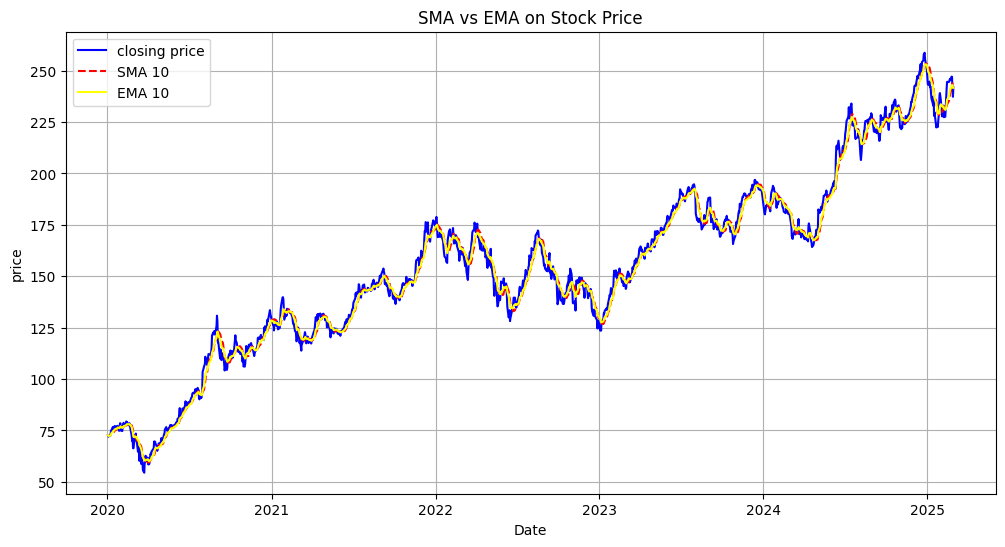

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(stock_data["Close"],label="closing price", color="blue")

#plot 10 day SMA and EMA

plt.plot(stock_data["SMA_10"], label="SMA 10", color="red" , linestyle="dashed")

plt.plot(stock_data["EMA_10"], label="EMA 10" ,color="yellow")

plt.xlabel("Date")
plt.ylabel("price")
plt.title("SMA vs EMA on Stock Price")
plt.legend()
plt.grid(True)
plt.show


In [71]:
print(stock_data.head())  # Check first few rows
print(stock_data.columns)  # Check column names
print(type(stock_data))  # Ensure it's a DataFrame


Price           Close       High        Low       Open     Volume SMA_10  \
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL          
Date                                                                       
2020-01-02  72.716064  72.776591  71.466805  71.721011  135480400    NaN   
2020-01-03  72.009109  72.771737  71.783954  71.941321  146322800    NaN   
2020-01-06  72.582916  72.621654  70.876083  71.127873  118387200    NaN   
2020-01-07  72.241554  72.849231  72.021238  72.592601  108872000    NaN   
2020-01-08  73.403648  73.706279  71.943759  71.943759  132079200    NaN   

Price      SMA_50     EMA_10  
Ticker                        
Date                          
2020-01-02    NaN  72.716064  
2020-01-03    NaN  72.327239  
2020-01-06    NaN  72.430020  
2020-01-07    NaN  72.367929  
2020-01-08    NaN  72.665256  
MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('V

In [72]:
# Flatten MultiIndex by joining column levels
stock_data.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in stock_data.columns]
stock_data.head()

,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,SMA_10_,SMA_50_,EMA_10_
Date,,,,,,,,
2020-01-02,72.716064,72.776591,71.466805,71.721011,135480400,NaN,NaN,72.716064
2020-01-03,72.009109,72.771737,71.783954,71.941321,146322800,NaN,NaN,72.327239
2020-01-06,72.582916,72.621654,70.876083,71.127873,118387200,NaN,NaN,72.430020
2020-01-07,72.241554,72.849231,72.021238,72.592601,108872000,NaN,NaN,72.367929
2020-01-08,73.403648,73.706279,71.943759,71.943759,132079200,NaN,NaN,72.665256


In [74]:
stock_data.head()

,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,SMA_10_,SMA_50_,EMA_10_
Date,,,,,,,,
2020-01-02,72.716064,72.776591,71.466805,71.721011,135480400,NaN,NaN,72.716064
2020-01-03,72.009109,72.771737,71.783954,71.941321,146322800,NaN,NaN,72.327239
2020-01-06,72.582916,72.621654,70.876083,71.127873,118387200,NaN,NaN,72.430020
2020-01-07,72.241554,72.849231,72.021238,72.592601,108872000,NaN,NaN,72.367929
2020-01-08,73.403648,73.706279,71.943759,71.943759,132079200,NaN,NaN,72.665256


In [75]:
print(stock_data.dtypes)


Close_AAPL     float64
High_AAPL      float64
Low_AAPL       float64
Open_AAPL      float64
Volume_AAPL      int64
SMA_10_        float64
SMA_50_        float64
EMA_10_        float64
dtype: object


In [76]:
print(stock_data.isnull().sum())


Close_AAPL      0
High_AAPL       0
Low_AAPL        0
Open_AAPL       0
Volume_AAPL     0
SMA_10_         9
SMA_50_        49
EMA_10_         0
dtype: int64


In [80]:
stock_data["SMA_10_"] = stock_data["SMA_10_"].fillna(stock_data["Close_AAPL"])
stock_data["SMA_50_"] = stock_data["SMA_50_"].fillna(stock_data["Close_AAPL"])


In [81]:
stock_data.head()

,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,SMA_10_,SMA_50_,EMA_10_
Date,,,,,,,,
2020-01-02,72.716064,72.776591,71.466805,71.721011,135480400,72.716064,72.716064,72.716064
2020-01-03,72.009109,72.771737,71.783954,71.941321,146322800,72.009109,72.009109,72.327239
2020-01-06,72.582916,72.621654,70.876083,71.127873,118387200,72.582916,72.582916,72.430020
2020-01-07,72.241554,72.849231,72.021238,72.592601,108872000,72.241554,72.241554,72.367929
2020-01-08,73.403648,73.706279,71.943759,71.943759,132079200,73.403648,73.403648,72.665256


In [83]:
#Bollinger Bands

import pandas as pd

# Assuming 'stock_data' is your DataFrame with 'Close_AAPL' as the closing price column
window = 20  # 20-day moving average

# Calculate SMA (Simple Moving Average)
stock_data["SMA_20"] = stock_data["Close_AAPL"].rolling(window=window).mean()

# Calculate Standard Deviation
stock_data["STD_20"] = stock_data["Close_AAPL"].rolling(window=window).std()

# Calculate Upper and Lower Bollinger Bands
stock_data["Upper_Band"] = stock_data["SMA_20"] + (2 * stock_data["STD_20"])
stock_data["Lower_Band"] = stock_data["SMA_20"] - (2 * stock_data["STD_20"])

# Display the first few rows to verify
print(stock_data[["Close_AAPL", "SMA_20", "Upper_Band", "Lower_Band"]].head(25))


            Close_AAPL     SMA_20  Upper_Band  Lower_Band
Date                                                     
2020-01-02   72.716064        NaN         NaN         NaN
2020-01-03   72.009109        NaN         NaN         NaN
2020-01-06   72.582916        NaN         NaN         NaN
2020-01-07   72.241554        NaN         NaN         NaN
2020-01-08   73.403648        NaN         NaN         NaN
2020-01-09   74.962791        NaN         NaN         NaN
2020-01-10   75.132278        NaN         NaN         NaN
2020-01-13   76.737419        NaN         NaN         NaN
2020-01-14   75.701225        NaN         NaN         NaN
2020-01-15   75.376808        NaN         NaN         NaN
2020-01-16   76.320984        NaN         NaN         NaN
2020-01-17   77.165962        NaN         NaN         NaN
2020-01-21   76.643013        NaN         NaN         NaN
2020-01-22   76.916573        NaN         NaN         NaN
2020-01-23   77.287003        NaN         NaN         NaN
2020-01-24   7

In [85]:
stock_data=stock_data.dropna()


In [87]:

# Display the first few rows to verify
print(stock_data[["Close_AAPL", "SMA_20", "Upper_Band", "Lower_Band"]].head(25))


            Close_AAPL     SMA_20  Upper_Band  Lower_Band
Date                                                     
2020-01-30   78.410378  75.545424   79.596119   71.494730
2020-01-31   74.933754  75.656309   79.496856   71.815762
2020-02-03   74.727951  75.792251   79.263993   72.320508
2020-02-04   77.195000  76.022855   79.196962   72.848748
2020-02-05   77.824471  76.302001   79.025976   73.578026
2020-02-06   78.734787  76.568558   79.137282   73.999834
2020-02-07   77.664558  76.703646   79.199954   74.207338
2020-02-10   78.033440  76.848704   79.297257   74.400151
2020-02-11   77.562637  76.889965   79.358353   74.421577
2020-02-12   79.404579  77.075133   79.717536   74.432729
2020-02-13   78.839142  77.248249   79.875794   74.620705
2020-02-14   78.858551  77.375128   80.058615   74.691641
2020-02-18   77.414612  77.387560   80.069270   74.705850
2020-02-19   78.535797  77.482199   80.186773   74.777626
2020-02-20   77.730072  77.522874   80.216076   74.829673
2020-02-21   7

In [88]:
#Define features and target variable

features= ["SMA_20", "Upper_Band", "Lower_Band"]
target="Close_AAPL"

In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X=stock_data[features]
Y=stock_data[target]

#split traing and testing sets


X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


#Train a simple Linear regression model

model=LinearRegression()
model.fit(X_train,Y_train)

#Make predictions on the test set

Y_pred=model.predict(X_test)